## This file:
 1) Loads a pickled batch of brick pictures  
 2) Loads a trained Keras-TensorFlow model basd on InceptionV3  
 3) Takes 1 new picture  
 4) Runs the pictures through the model to make predictions  
 5) Displays pictures from the original batch matching predictions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from PIL import Image, ImageOps
import numpy as np

#import os
import cPickle as pickle

from keras.models import load_model


from src import picture_stuff as pix
from src import load_model_and_go as ld

Using TensorFlow backend.


In [2]:
# This cell copied from main in load_model_and_go.py

use_gray = True
X,y_list = ld.load_examples("data/",use_gray)
filepath = '../saved_models/'
model = ld.load_keras_model(filepath, use_gray)
label_dic = ld.load_label_dictionary(filepath, use_gray)




In [3]:
picture_index_lookup = {}
for idx,label in enumerate(y_list):
    picture_index_lookup[label]=idx

In [4]:
label_dic_dummy,y_hot = pix.y_to_hot(y_list)

In [5]:
# DOES label_dic == label_dic_dummy???
for key in label_dic.keys():
    if label_dic[key] != label_dic_dummy[key]:
        print key, label_dic[key], label_dic_dummy[key]

In [6]:
def invert_label_dic(label_dic):
    invert_dic = {}
    for key,item in label_dic.iteritems():
        invert_dic[item] = key
    return invert_dic

In [7]:
print picture_index_lookup
print label_dic
invert_label_dict = invert_label_dic(label_dic)
print invert_label_dict

{50304: 49, 3460: 33, 4743: 44, 3308: 32, 50955: 50, 2450: 5, 41748: 40, 61487: 52, 6179: 53, 30499: 24, 48933: 48, 3622: 34, 30503: 25, 30504: 26, 41769: 41, 4445: 43, 2357: 0, 3895: 39, 3001: 7, 3002: 8, 3003: 9, 3004: 10, 3005: 11, 3007: 12, 3009: 13, 3010: 14, 4854: 46, 6215: 55, 3660: 35, 48183: 45, 3020: 15, 44237: 42, 3022: 16, 3023: 17, 3024: 18, 3666: 36, 3795: 38, 3030: 19, 3031: 20, 3032: 21, 6183: 54, 2780: 6, 3037: 22, 3039: 23, 3297: 30, 3298: 31, 6141: 51, 2412: 1, 2413: 2, 4861: 47, 2420: 3, 3710: 37, 3062: 27, 3069: 28, 3070: 29, 2431: 4}
{0: 2357, 1: 2412, 2: 2413, 3: 2420, 4: 2431, 5: 2450, 6: 2780, 7: 3001, 8: 3002, 9: 3003, 10: 3004, 11: 3005, 12: 3007, 13: 3009, 14: 3010, 15: 3020, 16: 3022, 17: 3023, 18: 3024, 19: 3030, 20: 3031, 21: 3032, 22: 3037, 23: 3039, 24: 3062, 25: 3069, 26: 3070, 27: 3297, 28: 3298, 29: 3308, 30: 3460, 31: 3622, 32: 3660, 33: 3666, 34: 3710, 35: 3795, 36: 3895, 37: 4445, 38: 4743, 39: 4854, 40: 4861, 41: 6141, 42: 6179, 43: 6183, 44: 621

### PART 3: shoot a picture of a brick

In [8]:
image_dims = 299
border_fraction = .3

In [9]:
def shoot_crop_and_scale(camera,use_gray=True,image_dims=299,border_fraction=0.3):
    # Shoot picture, crop and scale
    pic = pix.shoot_pic(camera)

    if use_gray:
        pic = pix.convert_to_gray(pic)
    im = Image.fromarray(pic)
    newpic = ImageOps.fit(im, (image_dims,image_dims), Image.ANTIALIAS,
                          border_fraction, (.5,.5))
    return np.array(newpic)

### To repeat and shoot/classify more bricks, "run all below" from here

Type label (integer as file name):joshs
testing: brick_pic_temp_files/joshs-001.jpeg
Save next picture as:  brick_pic_temp_files/joshs-001.jpeg


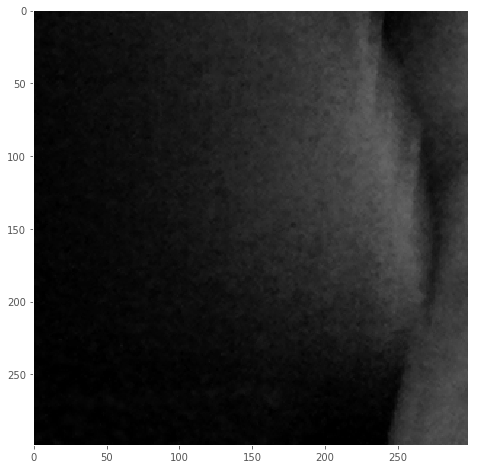

Enter 0:reshoot, any other:save0


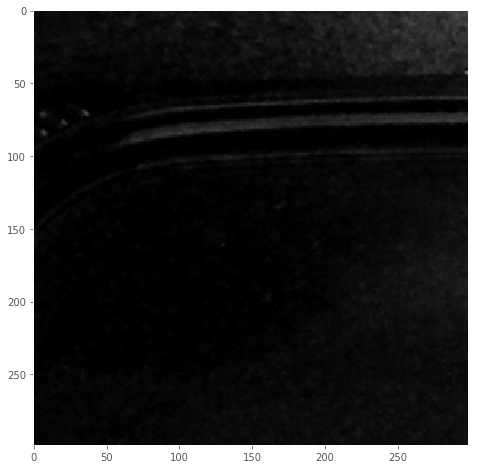

Enter 0:reshoot, any other:save0


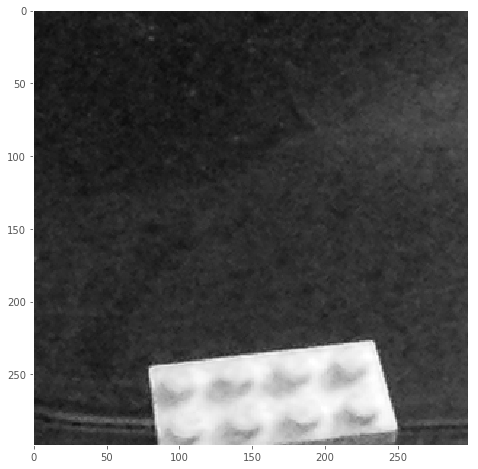

Enter 0:reshoot, any other:save0


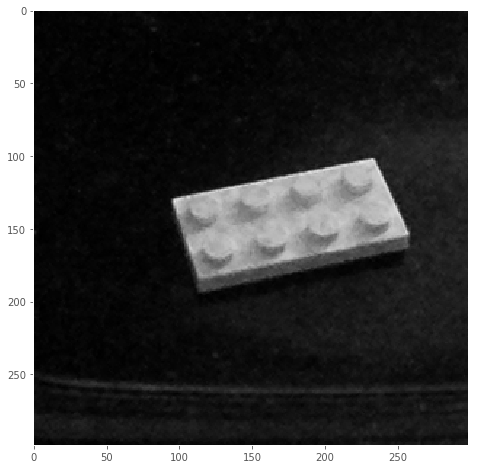

Enter 0:reshoot, any other:save


In [33]:
camera = pix.initialize_camera()

# Input a file name = brick shape: e.g. 3021
pic_label = raw_input('Type label (integer as file name):')


extension = 1
extension, filename = pix.increment_filename(pic_label,extension)


keep_shooting = True
while keep_shooting:
    one_pic_X = pix.shoot_crop_and_scale(camera,use_gray=True)
    
    fig, ax = plt.subplots(1,figsize=(8,8))
    ax.imshow(one_pic_X[:,:,::-1], cmap=plt.cm.gray_r, interpolation="nearest")
    ax.grid(False)
    plt.show();

    next_action = raw_input('Enter 0:reshoot, any other:save')

    if next_action != '0':
        pix.save_pic(filename,one_pic_X)
        keep_shooting = False

del(camera)

### PART 4: predictions on new brick picture

In [34]:
predict_gen = model.predict_on_batch(np.expand_dims(one_pic_X,axis=0))

In [35]:
prediction_list, prediction_weights = pix.make_full_prediction_list(
    predict_gen,label_dic,n_match=10)

preds = prediction_list[0]
weights = prediction_weights[0]
idx_preds = [picture_index_lookup[pred] for pred in preds]

In [36]:
print predict_gen.shape
print preds
print weights
print idx_preds

(1, 56)
[41769, 48183, 3795, 50304, 4854, 30503, 6179, 3297, 3460, 3037]
[ 0.92191297  0.01985542  0.01725336  0.01073608  0.00694915  0.00495711
  0.00490981  0.00244294  0.0019028   0.00151431]
[41, 45, 38, 49, 46, 25, 53, 30, 33, 22]


In [37]:
print "label for this item {}".format(pic_label)
print "Top 5 predictions ", preds

label for this item joshs
Top 5 predictions  [41769, 48183, 3795, 50304, 4854, 30503, 6179, 3297, 3460, 3037]


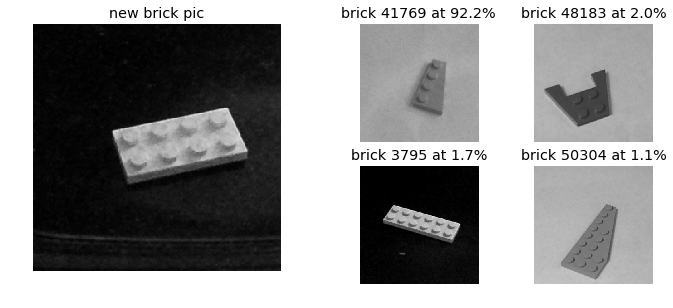

In [38]:
fig, ax = plt.subplots(1,figsize=(12,10))

ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=2)
ax1.imshow(Image.fromarray(one_pic_X[:,:,::-1]))

ax1.set_title("new brick pic")
ax1.grid(False)
ax1.axis('off')

for idx1 in range(2):
    ax2 = plt.subplot2grid((4, 4), (0,idx1+2))
    ax2.imshow(Image.fromarray(X[idx_preds[idx1]]))
    ax2.set_title("brick {} at {:.1f}%".format(
        preds[idx1],100*weights[idx1]))
    ax2.grid(False)
    ax2.axis('off')
    
    ax3 = plt.subplot2grid((4, 4), (1,idx1+2))
    ax3.imshow(Image.fromarray(X[idx_preds[idx1+2]]))
    ax3.set_title("brick {} at {:.1f}%".format(
        preds[idx1+2],100*weights[idx1+2]))
    ax3.grid(False)
    ax3.axis('off')

# If you like the figure, save it!
picfilename = ("saved_brick_predictions/" + str(pic_label) + "_temp.png")
with open(picfilename, 'wb') as whatever:
    fig.savefig(whatever)